In [1]:
import pandas as pd
import numpy as np
import time
import re

# necessary plotting
import seaborn as sns
import matplotlib.pyplot as plt

# nltk
# import nltk 
# nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer

# Sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix, classification_report


# Import the dataset 
DATA_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "text"]
DATA_ENCODING = 'ISO-8859-1'

dataset = pd.read_csv('../training.1600000.processed.noemoticon.csv', encoding=DATA_ENCODING, names=DATA_COLUMNS)

# Removing unnecessary columns
dataset = dataset[['sentiment', 'text']]

# Replacing the value to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Sorting data in lists
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

# Plotting the distriduction for dataset
# ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distridution of data', legend=False)
# ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

def preprocess(textData):
    processedText = []
    
    # Lemmatizer and Stemmer
    wordlemm = WordNetLemmatizer()
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1\+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textData:
        tweet = tweet.lower()
        
        # Replace all links with "URL"
        tweet = re.sub(urlPattern, ' URL', tweet)
        # Replace Emojis from the tweet
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERAME with USER
        tweet = re.sub(userPattern, ' USER', tweet)
        # Replace all non-Alphabets
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        tweetWords = ''
        for word in tweet.split():
            # Check if the word is a stopword.
            # if word not in stepWordList:
            if len(word) > 1:
                # Lemmatize it
                word = wordlemm.lemmatize(word)
                tweetWords += (word+' ')
                
        processedText.append(tweetWords)
        
    return processedText

t = time.time()
processesedtext = preprocess(text)
# print the processing
print("The Text Preprocessing Complete.")
print(f"Time Taken: {round(time.time()-t)} seconds")


The Text Preprocessing Complete.
Time Taken: 105 seconds


In [2]:
# from wordcloud import WordCloud
# data_neg = processesedtext[:800000]
# plt.figure(figsize = (20, 20))
# wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
# plt.imshow(wc)

In [1]:
# data_pos = processesedtext[800000:]
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#               collocations=False).generate(" ".join(data_pos))
# plt.figure(figsize = (20,20))
# plt.imshow(wc)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(processesedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [5]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000, lowercase=False)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  500000


In [6]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [7]:
# Creating and Evaluating Models:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



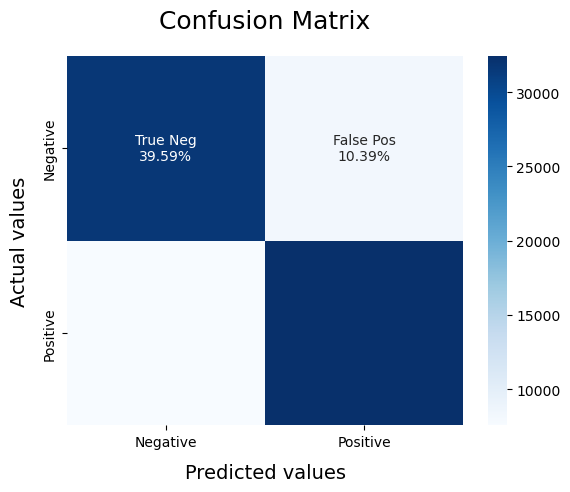

In [8]:
# First model is called BernoulliNB:

# BNBmodel = BernoulliNB(alpha = 2)
# BNBmodel.fit(X_train, y_train)
# model_Evaluate(BNBmodel)

/home/ezechielwill/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



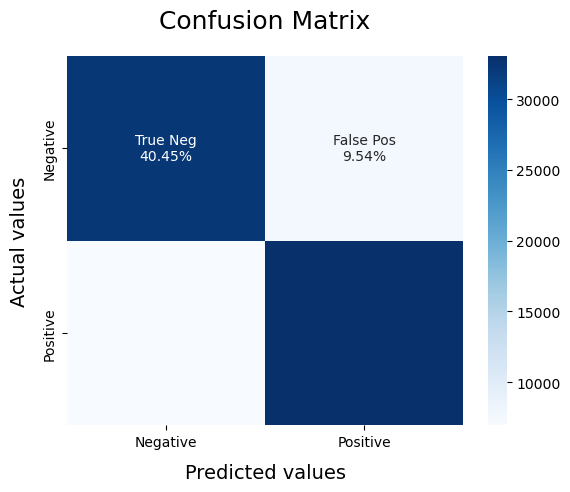

In [9]:
# Second is the LinearSVC Model (Linear Support Vector Classification)

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



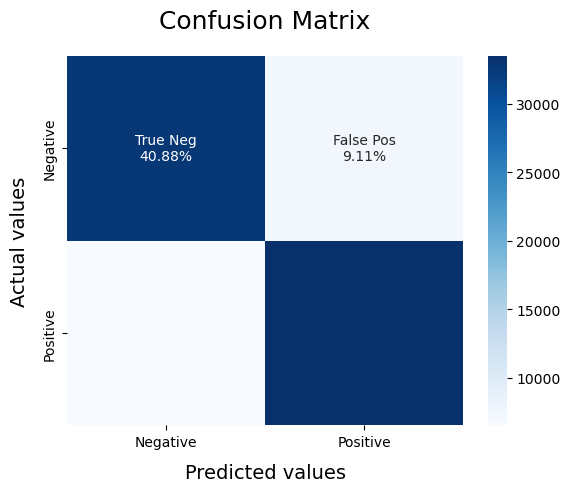

In [10]:
# The third model is Logistic Regression Model (LR)

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [11]:
# Save all model trained so far using PICKLE 

file1 = open('../vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file1)
file1.close()

file2 = open('../Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file2)
file2.close()

file3 = open('../Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file3)
file3.close()

print("All models are save for later use.")

All models are save for later use.


In [15]:
import pickle

def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('../vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('../Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "Do they really care about me, They hate me",
            "Dad I love so much, you are my hero",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                                         text sentiment
0                              I hate twitter  Negative
1  Do they really care about me, They hate me  Negative
2     Dad I hate so much, you not are my hero  Negative
3                  May the Force be with you.  Positive
4             Mr. Stark, I don't feel so good  Negative
